In [1]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import MiniBatchKMeans

In [2]:
heart_disease_df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data',encoding = "ISO-8859-1", engine='c',sep=',',names=['Age','Sex','Cp','Trestbps','Chol','Fbs','Restecg','Thalach','Exang','Oldpeak','Slope','Ca','Thal','Num'])

In [3]:
heart_disease_df

,Age,Sex,Cp,Trestbps,Chol,Fbs,Restecg,Thalach,Exang,Oldpeak,Slope,Ca,Thal,Num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,2
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,3
301,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.0,3.0,1


For the 'Sex' column , 1=male and 0=female

In [4]:
heart_disease_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Age       303 non-null    float64
 1   Sex       303 non-null    float64
 2   Cp        303 non-null    float64
 3   Trestbps  303 non-null    float64
 4   Chol      303 non-null    float64
 5   Fbs       303 non-null    float64
 6   Restecg   303 non-null    float64
 7   Thalach   303 non-null    float64
 8   Exang     303 non-null    float64
 9   Oldpeak   303 non-null    float64
 10  Slope     303 non-null    float64
 11  Ca        303 non-null    object 
 12  Thal      303 non-null    object 
 13  Num       303 non-null    int64  
dtypes: float64(11), int64(1), object(2)
memory usage: 33.3+ KB


In [5]:
heart_disease_df.Ca.unique()

array(['0.0', '3.0', '2.0', '1.0', '?'], dtype=object)

In [6]:
heart_disease_df.Thal.unique()

array(['6.0', '3.0', '7.0', '?'], dtype=object)

In [7]:
heart_disease_df[(heart_disease_df.Ca=='?') | (heart_disease_df.Thal=='?')]

,Age,Sex,Cp,Trestbps,Chol,Fbs,Restecg,Thalach,Exang,Oldpeak,Slope,Ca,Thal,Num
87,53.0,0.0,3.0,128.0,216.0,0.0,2.0,115.0,0.0,0.0,1.0,0.0,?,0
166,52.0,1.0,3.0,138.0,223.0,0.0,0.0,169.0,0.0,0.0,1.0,?,3.0,0
192,43.0,1.0,4.0,132.0,247.0,1.0,2.0,143.0,1.0,0.1,2.0,?,7.0,1
266,52.0,1.0,4.0,128.0,204.0,1.0,0.0,156.0,1.0,1.0,2.0,0.0,?,2
287,58.0,1.0,2.0,125.0,220.0,0.0,0.0,144.0,0.0,0.4,2.0,?,7.0,0
302,38.0,1.0,3.0,138.0,175.0,0.0,0.0,173.0,0.0,0.0,1.0,?,3.0,0


In [8]:
heart_disease_df.drop([heart_disease_df.index[87] , heart_disease_df.index[166],heart_disease_df.index[192],heart_disease_df.index[266],heart_disease_df.index[287],heart_disease_df.index[302]],inplace=True)

In [9]:
heart_disease_df.astype({"Ca": float, "Thal": float})

,Age,Sex,Cp,Trestbps,Chol,Fbs,Restecg,Thalach,Exang,Oldpeak,Slope,Ca,Thal,Num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,57.0,0.0,4.0,140.0,241.0,0.0,0.0,123.0,1.0,0.2,2.0,0.0,7.0,1
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,2
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,3


In [10]:
heart_disease_df.reset_index(inplace=True)
heart_disease_df

,index,Age,Sex,Cp,Trestbps,Chol,Fbs,Restecg,Thalach,Exang,Oldpeak,Slope,Ca,Thal,Num
0,0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
292,297,57.0,0.0,4.0,140.0,241.0,0.0,0.0,123.0,1.0,0.2,2.0,0.0,7.0,1
293,298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1
294,299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,2
295,300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,3


Here, column 'Num' is our target variable.

In [29]:
X = heart_disease_df.drop('Num',axis=1)
y = heart_disease_df.Num

In [37]:
X_std

array([[-1.71690766,  0.93618065,  0.69109474, ...,  2.26414539,
        -0.72197605,  0.65587737],
       [-1.70543663,  1.3789285 ,  0.69109474, ...,  0.6437811 ,
         2.47842525, -0.89422007],
       [-1.69396561,  1.3789285 ,  0.69109474, ...,  0.6437811 ,
         1.41162482,  1.17257652],
       ...,
       [ 1.71292949,  1.48961547,  0.69109474, ...,  0.6437811 ,
         1.41162482,  1.17257652],
       [ 1.72440052,  0.27205887,  0.69109474, ...,  0.6437811 ,
         0.34482438,  1.17257652],
       [ 1.73587155,  0.27205887, -1.44697961, ...,  0.6437811 ,
         0.34482438, -0.89422007]])

In [30]:
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

In [59]:
kmeans_cluster = KMeans(n_clusters=2, random_state=123)

In [60]:
%timeit kmeans_cluster.fit(X_std)
y_pred = kmeans_cluster.fit_predict(X_std)

38.7 ms ± 170 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [61]:
pca = PCA(n_components=2).fit_transform(X_std)

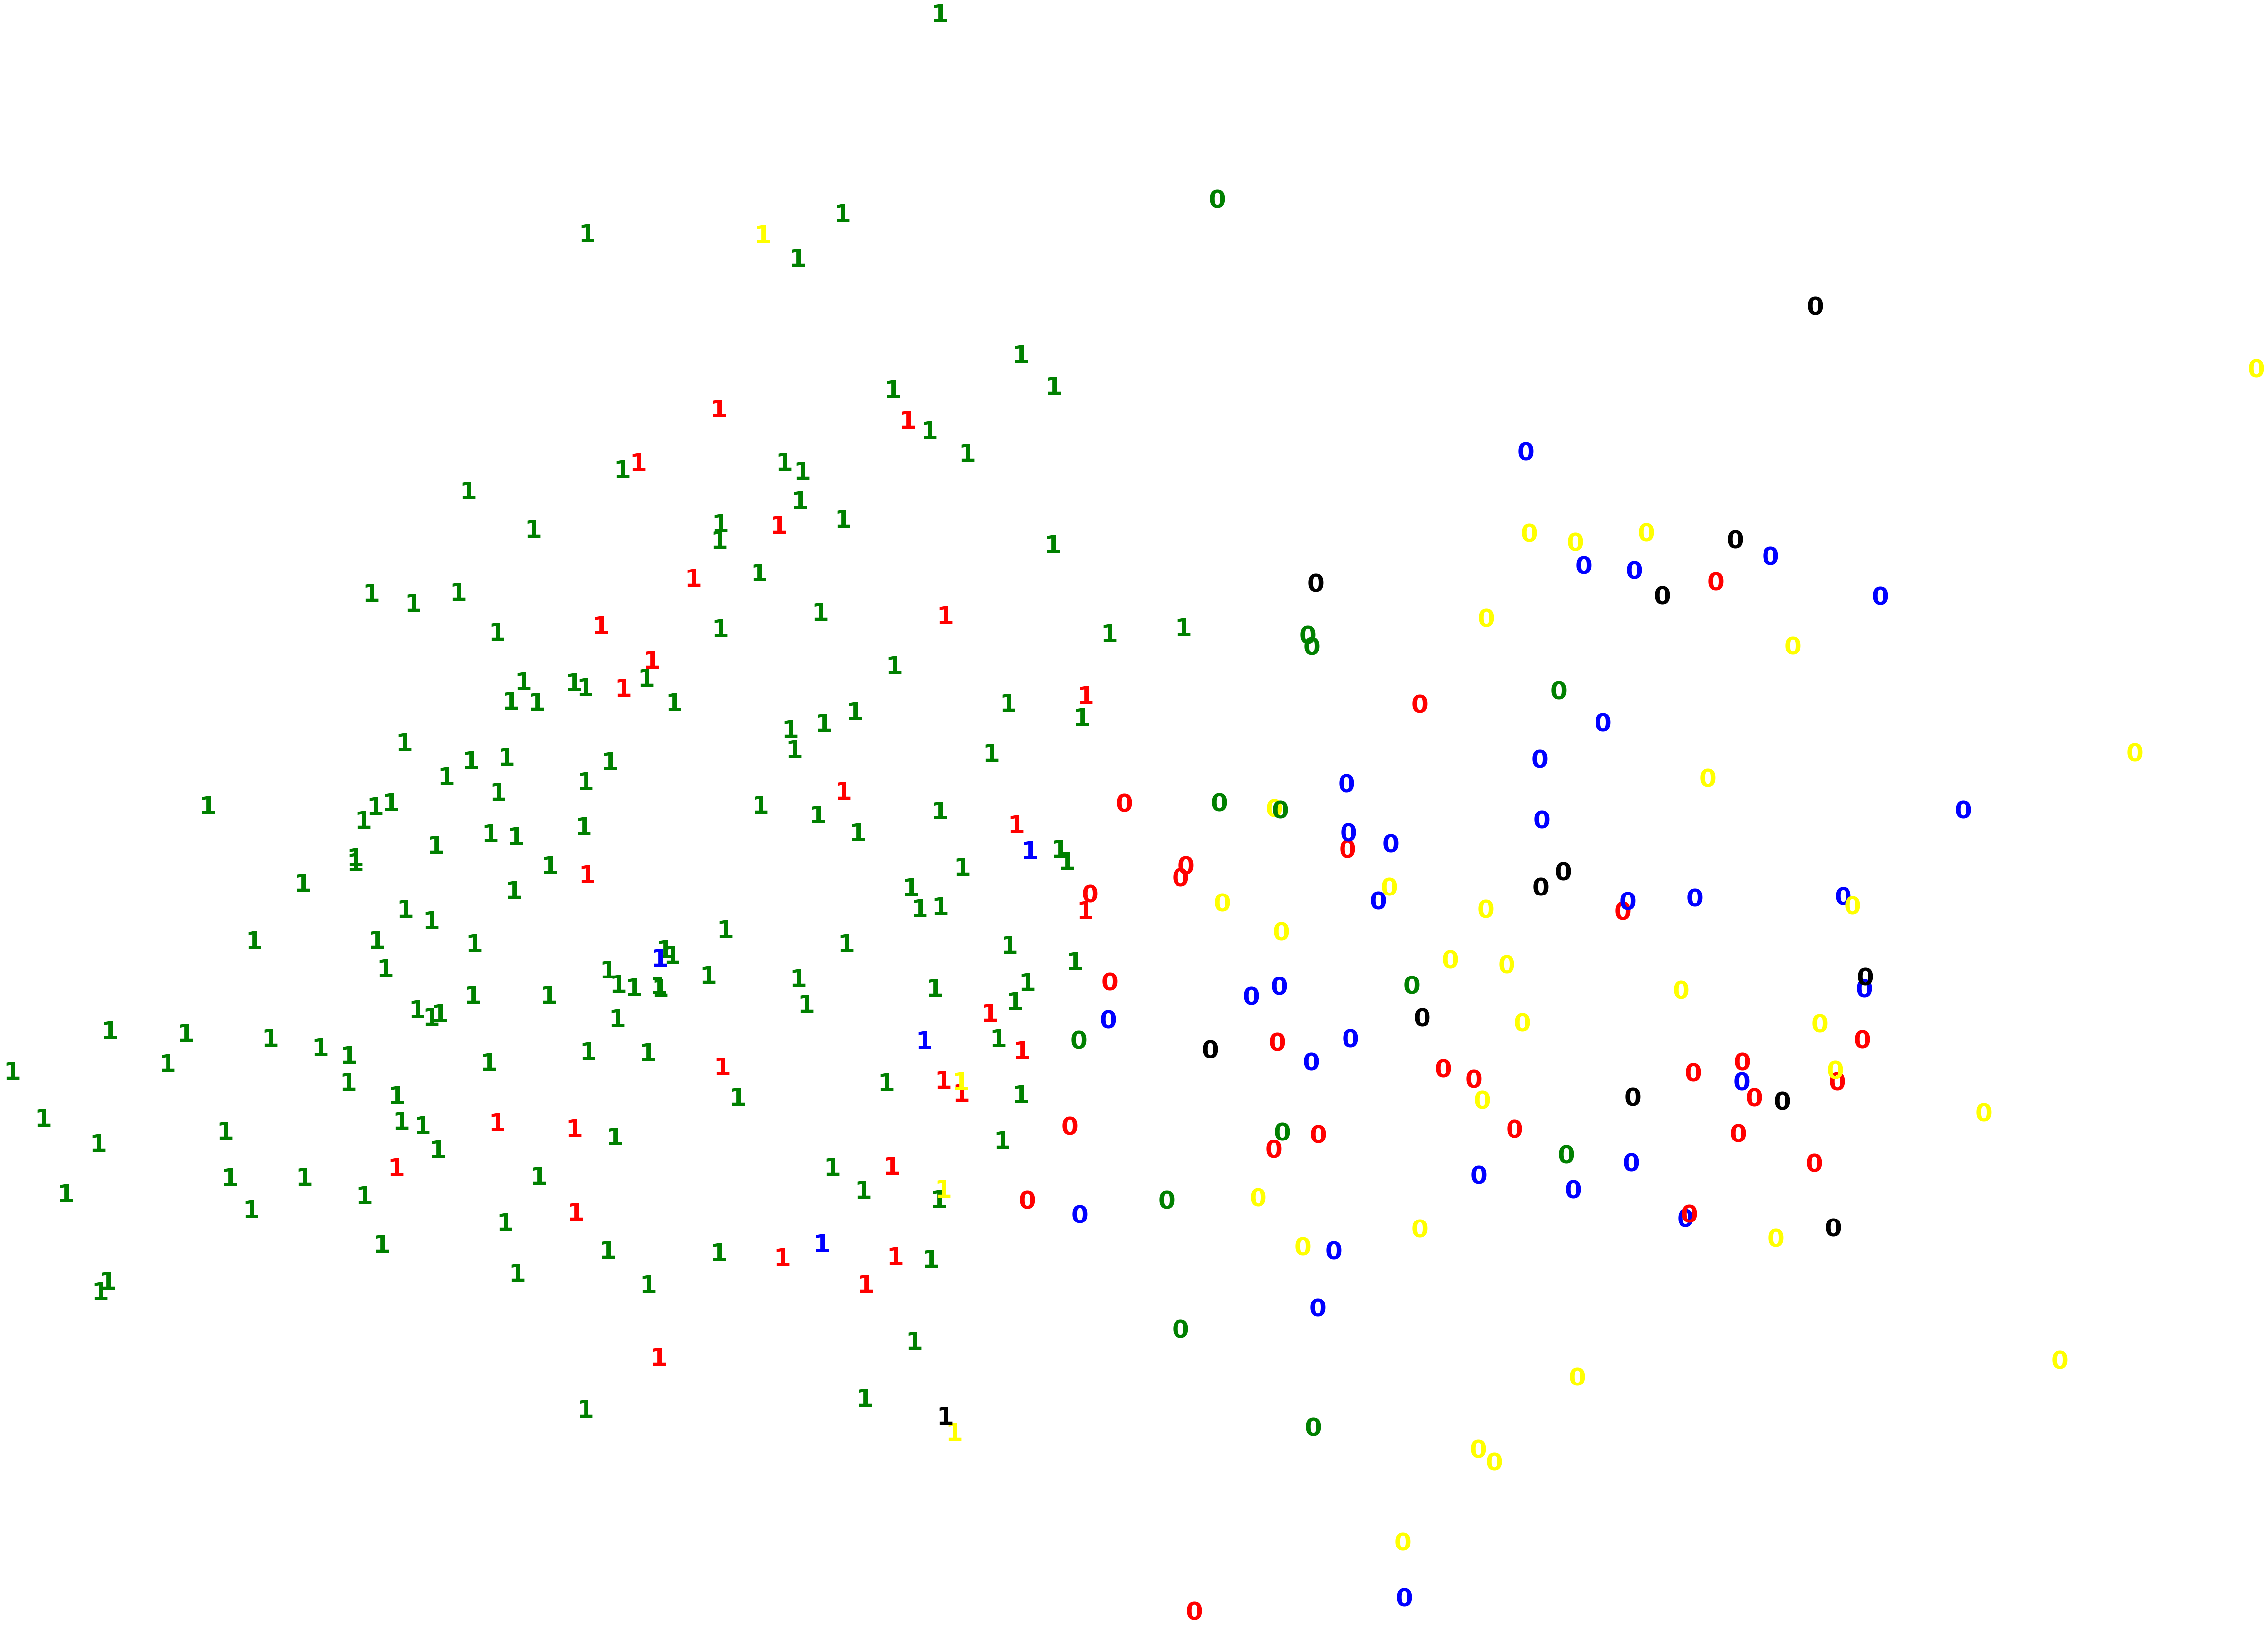

In [63]:
plt.figure(figsize=(10,8))
colours = ['green','red','blue','yellow','black']
for i in range(pca.shape[0]):
    plt.text(pca[i, 0], pca[i, 1], str(y_pred[i]),
             color=colours[y[i]],
             fontdict={'weight': 'bold', 'size': 50}
        )

plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

We can see that this model is succesfull for the color green but i think that we need a higher k-value since Num has 5 different values.

let us try when number of clusters is 4.

In [67]:
kmeans_cluster = KMeans(n_clusters=4, random_state=123)
%timeit kmeans_cluster.fit(X_std)
y_pred = kmeans_cluster.fit_predict(X_std)

56.2 ms ± 914 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


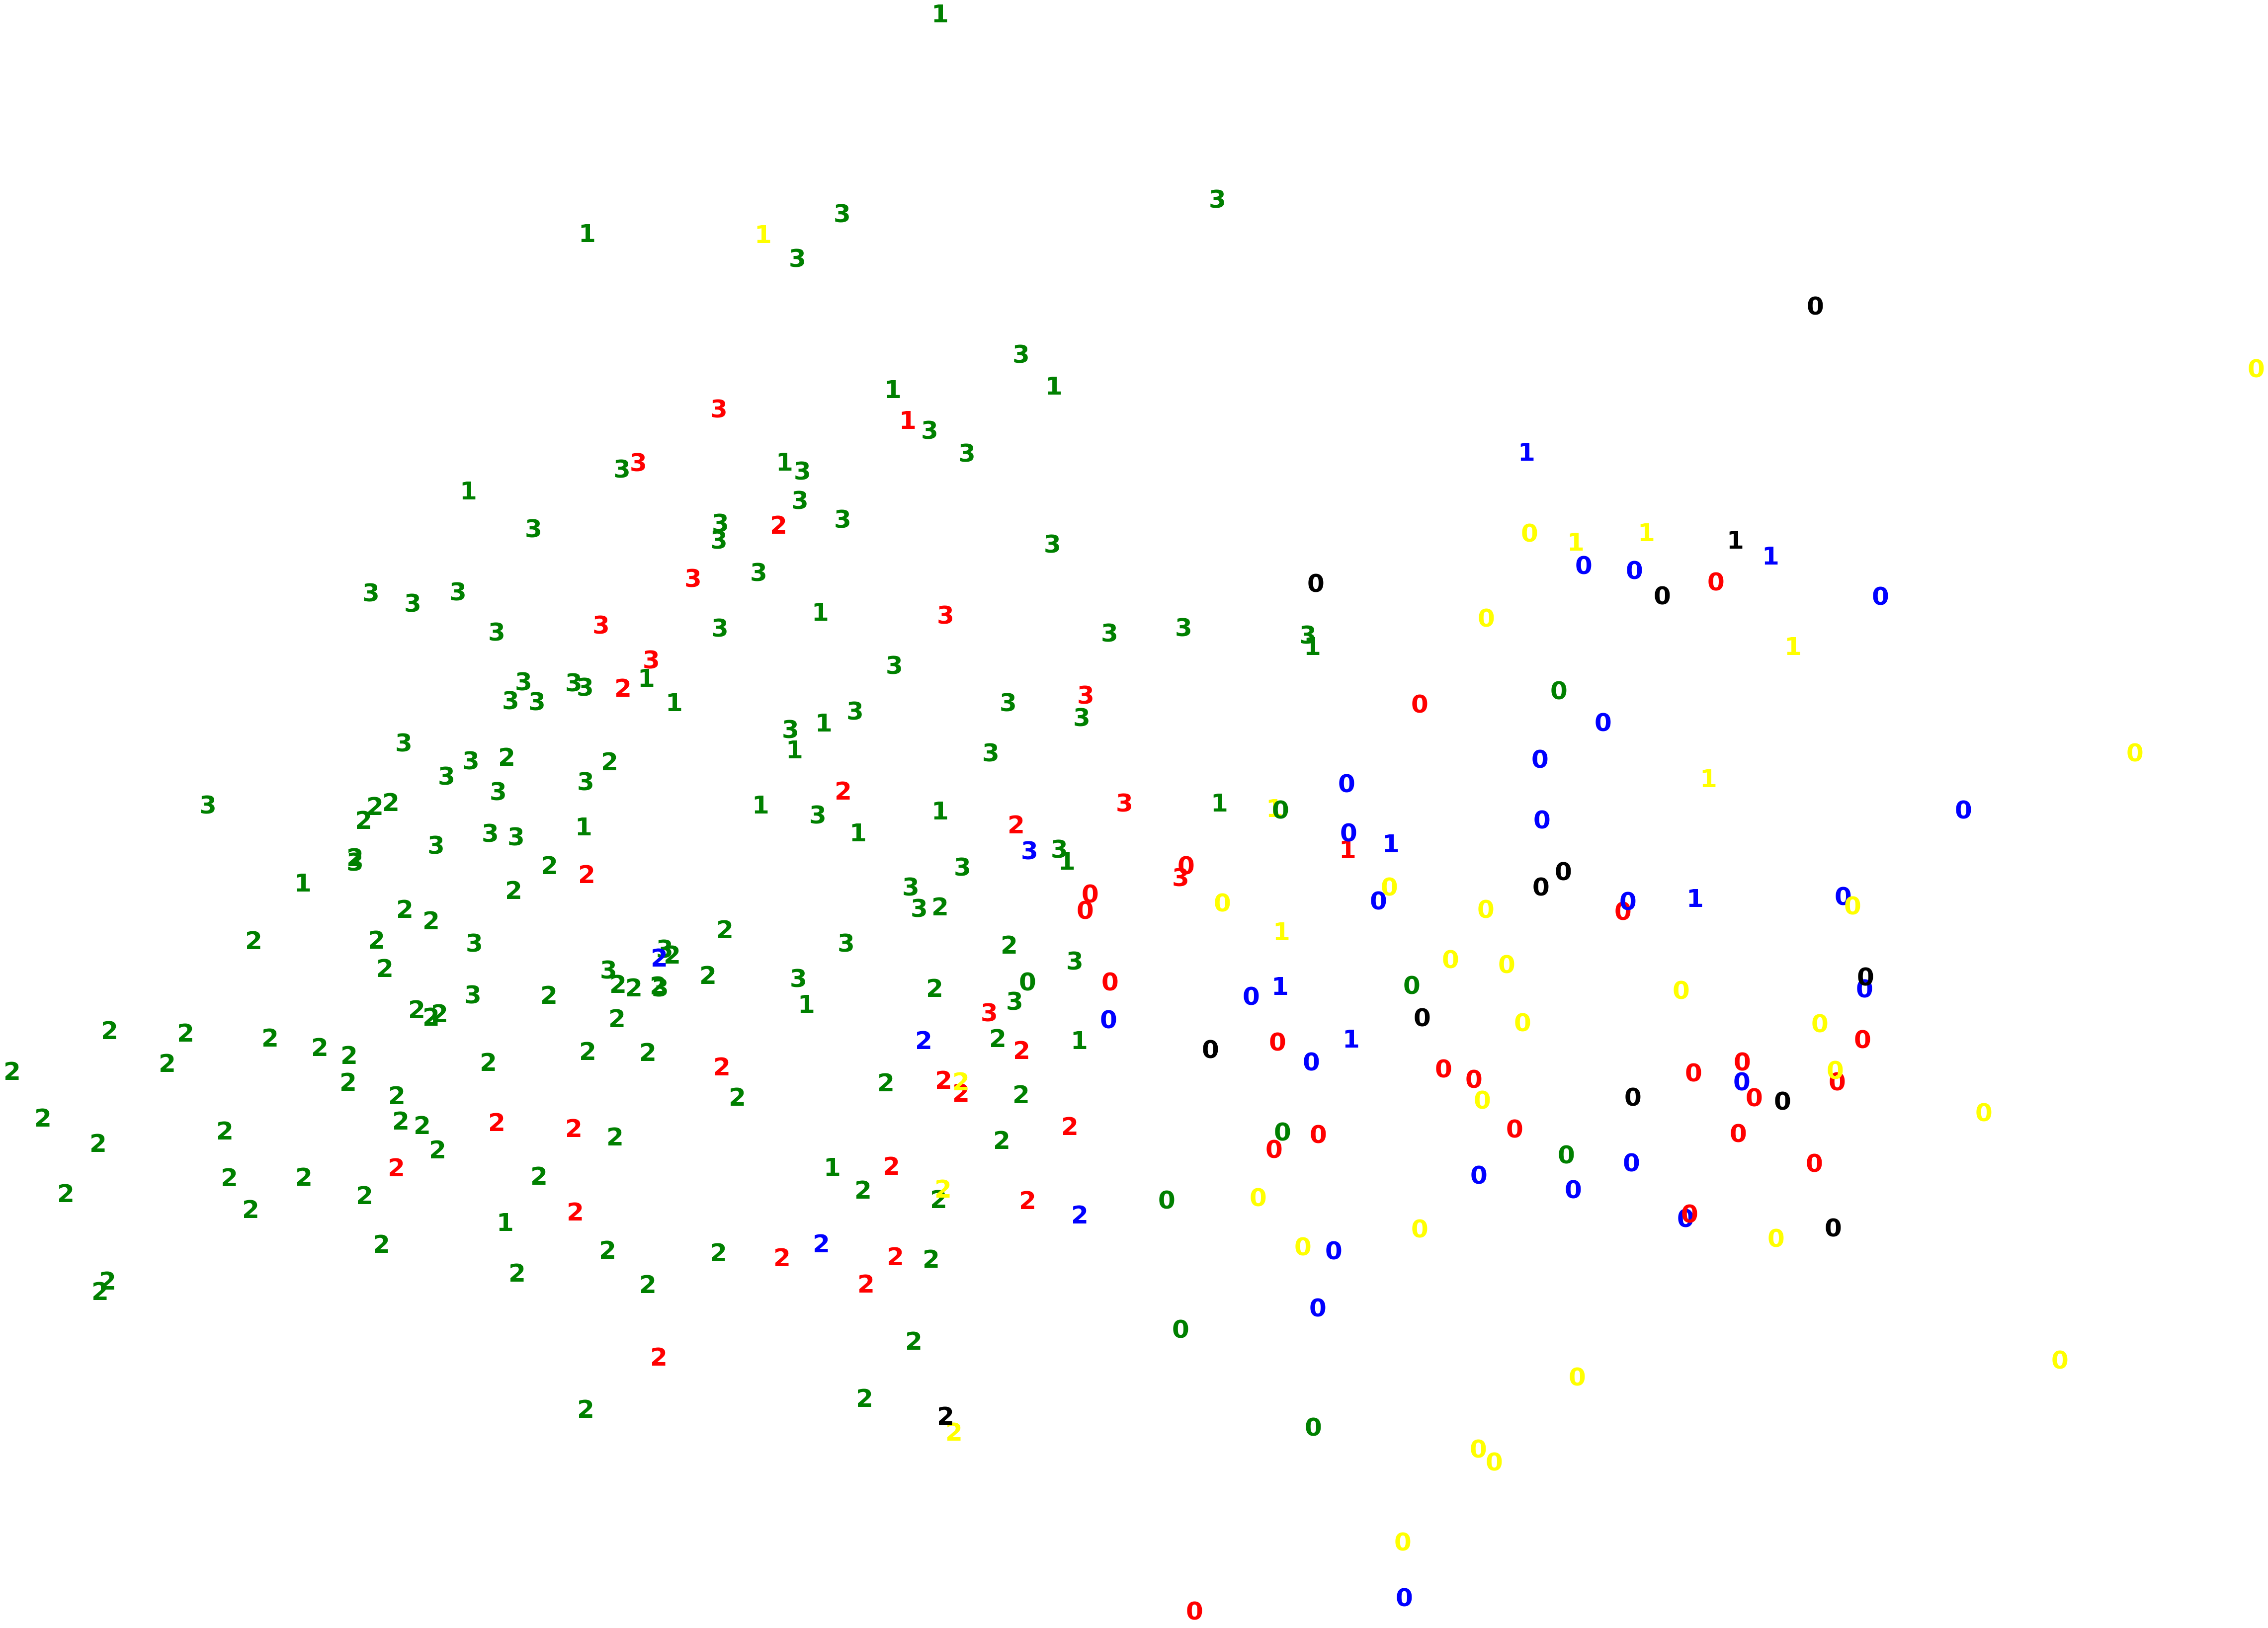

In [68]:
pca = PCA(n_components=2).fit_transform(X_std)
plt.figure(figsize=(10,8))
colours = ['green','red','blue','yellow','black']
for i in range(pca.shape[0]):
    plt.text(pca[i, 0], pca[i, 1], str(y_pred[i]),
             color=colours[y[i]],
             fontdict={'weight': 'bold', 'size': 50}
        )

plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

It also doesn't seem a very successfull model to me unfortunately.